In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.pipeline import Pipeline
from pandas_profiling import ProfileReport
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## **Exploracion de los Datos**

In [27]:
df = pd.read_csv('../Dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [28]:
# nombres de las columnas
print(f'Columnas y dimensiones: {df.columns}, {df.shape}')

Columnas y dimensiones: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object'), (5110, 12)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [30]:
df['bmi'].fillna((df['bmi'].mean()), inplace=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


C:\Users\Liz\AppData\Local\Temp\ipykernel_40124\3997962454.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


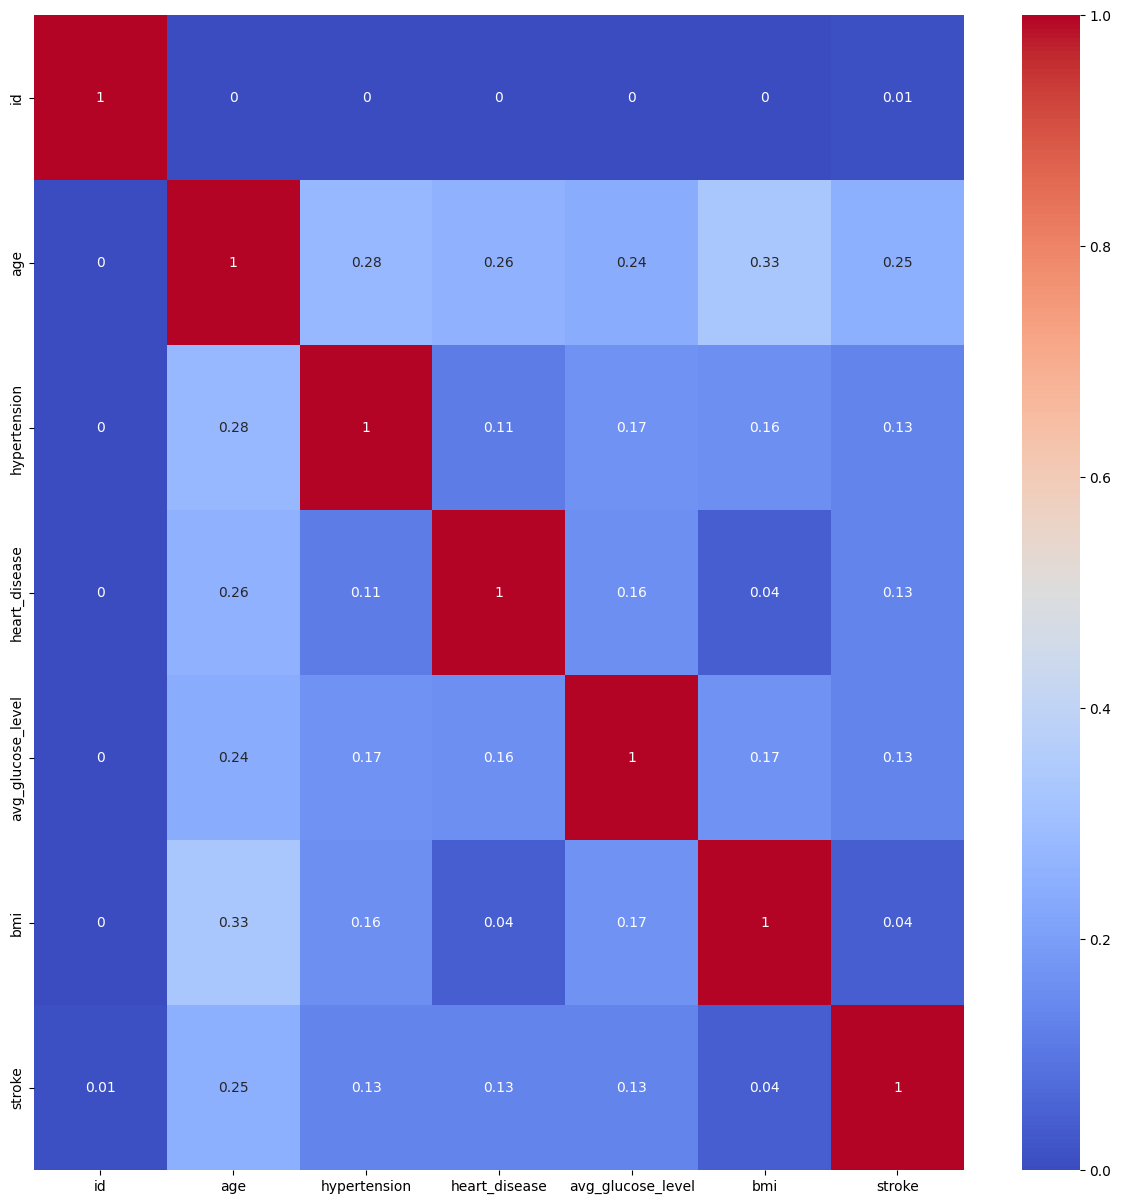

In [32]:
corr = df.corr()
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
sns.heatmap(round(corr,2).abs(), annot=True, cmap="coolwarm", ax=ax); 

In [33]:
#	bmi	smoking_status	stroke
print(
    f'''
    Genero: {df['gender'].unique().tolist()}
    Casado: {df['ever_married'].unique().tolist()}
    Tipo de trabajo: {df['work_type'].unique().tolist()}
    Tipo de residencia: {df['Residence_type'].unique().tolist()}
    Estado de fumador: {df['smoking_status'].unique().tolist()}
    '''
)


    Genero: ['Male', 'Female', 'Other']
    Casado: ['Yes', 'No']
    Tipo de trabajo: ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
    Tipo de residencia: ['Urban', 'Rural']
    Estado de fumador: ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
    


In [34]:
df.gender = df.gender.astype("category").cat.codes
df.ever_married = df.ever_married.astype("category").cat.codes
df.work_type = df.work_type.astype("category").cat.codes
df.Residence_type = df.Residence_type.astype("category").cat.codes
df.smoking_status = df.smoking_status.astype("category").cat.codes

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


Genero:
    1-> Female  0-> Male  2-> Other
Casado: 
    1-> Yes 0-> No
Tipo de trabajo: [2, 3, 0, 4, 1]
    1-> Never_worked 0-> children 2-> Private 3-> Self-employed 4-> Govt_job
Tipo de residencia: [1, 0]
    1-> Urban 0-> Rural
Estado de fumador: [1, 2, 3, 0]
    1-> formerly smoked 2-> never smoked 3-> smokes 0-> Unknown

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int8   
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int8   
 6   work_type          5110 non-null   int8   
 7   Residence_type     5110 non-null   int8   
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int8   
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), int8(5)
memory usage: 304.5 KB


### Modelos

In [47]:
X = df.drop(['stroke'], axis=1)
X = pd.DataFrame(StandardScaler().fit_transform(X))
y = df.stroke

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [49]:
logisticRModel = Pipeline([("scaler", StandardScaler()), ("LogisticRegression", LogisticRegression(random_state=0))])
logisticRModel.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LogisticRegression', LogisticRegression(random_state=0))])

Text(0.5, 427.9555555555555, 'Predicted label')

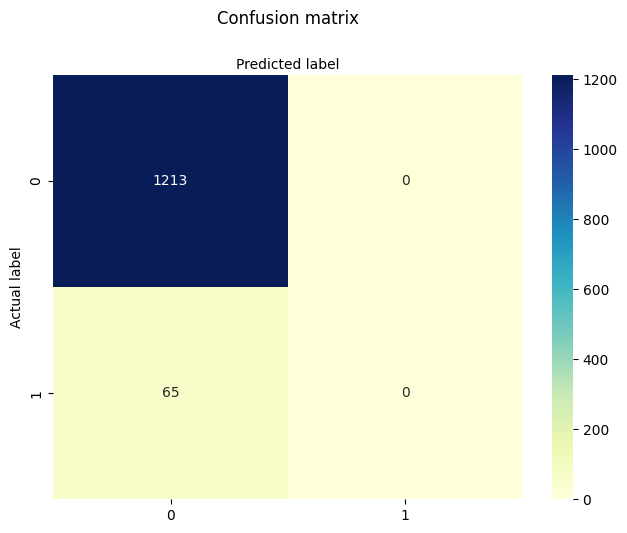

In [51]:
y_pred = logisticRModel.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
